In [0]:
# We first get all the relevant imports
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# We get the data
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-04-18 19:22:44--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-04-18 19:22:44 (48.7 MB/s) - ‘moore.csv’ saved [2302/2302]



In [0]:
# Load the data 
data = pd.read_csv('moore.csv', header=None).values # Load as numpy
X = data[:,0].reshape(-1,1) # 2D array of size NxD, D=1
y = data[:,1].reshape(-1,1)

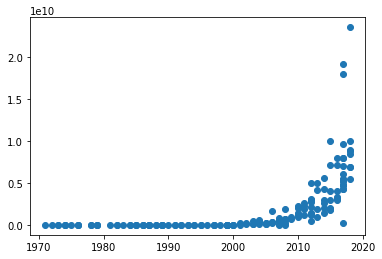

In [6]:
# Plot the data
plt.scatter(X,y)

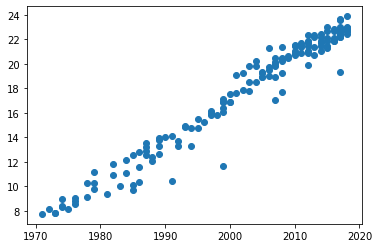

In [7]:
# A linear model is desired, so we take the log
y = np.log(y)
plt.scatter(X,y)

In [0]:
# We perform data pre-processing
# The data is standardized/normalized for X and y
mean_X = X.mean()
std_X = X.std()
mean_y = y.mean()
std_y = y.std()

# We keep the above as variables, to reverse transformations and go back to orig. units.

X = (X - mean_X) / std_X
y = (y - mean_y) / std_y

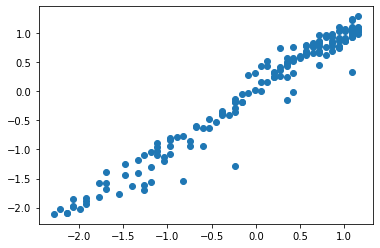

In [9]:
plt.scatter(X,y)

In [0]:
X = X.astype(np.float32)
y = y.astype(np.float32)

In [0]:
# Create the linear regression model
model = nn.Linear(1,1)

In [0]:
# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.7)

In [0]:
# Prepare the data
inputs = torch.from_numpy(X)
targets = torch.from_numpy(y)

In [15]:
# Train the model
number_epochs = 100
losses = []
for iteration in range(number_epochs):
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
    print("Epoch {}/{}, Loss: {}".format(iteration+1, number_epochs, loss.item()))

Epoch 1/100, Loss: 1.9233025312423706
Epoch 2/100, Loss: 1.848663568496704
Epoch 3/100, Loss: 1.726664423942566
Epoch 4/100, Loss: 1.578623652458191
Epoch 5/100, Loss: 1.4200716018676758
Epoch 6/100, Loss: 1.2616569995880127
Epoch 7/100, Loss: 1.110216736793518
Epoch 8/100, Loss: 0.9697707295417786
Epoch 9/100, Loss: 0.8423431515693665
Epoch 10/100, Loss: 0.7286048531532288
Epoch 11/100, Loss: 0.6283503770828247
Epoch 12/100, Loss: 0.5408411622047424
Epoch 13/100, Loss: 0.465045690536499
Epoch 14/100, Loss: 0.39980053901672363
Epoch 15/100, Loss: 0.3439164459705353
Epoch 16/100, Loss: 0.29624372720718384
Epoch 17/100, Loss: 0.25570982694625854
Epoch 18/100, Loss: 0.2213389128446579
Epoch 19/100, Loss: 0.19225870072841644
Epoch 20/100, Loss: 0.1676999032497406
Epoch 21/100, Loss: 0.14699095487594604
Epoch 22/100, Loss: 0.12955039739608765
Epoch 23/100, Loss: 0.11487765610218048
Epoch 24/100, Loss: 0.10254421085119247
Epoch 25/100, Loss: 0.09218449890613556
Epoch 26/100, Loss: 0.08348797

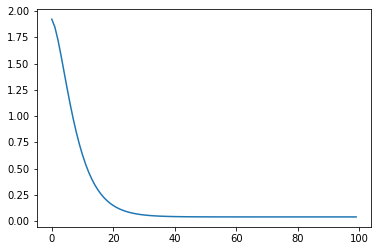

In [16]:
# Loss per iter
plt.plot(losses)

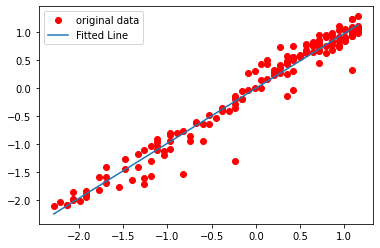

In [17]:
# Plot the line of best fit
predicted = model(torch.from_numpy(X)).detach().numpy()
plt.plot(X, y, 'ro', label='original data')
plt.plot(X, predicted, label='Fitted Line')
plt.legend()
plt.show()

In [20]:
# Weights:
w = model.weight.data.numpy()
print(w)

[[0.9803478]]


In [0]:
a = w[0,0] * std_y / std_X

In [24]:
print("Doubling time:", np.log(2) / a)

Doubling time: 2.0290916168228317
